# Kerr-Schild coordinates on Kerr spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

The involved computations are based on tools developed through the [SageManifolds](http://sagemanifolds.obspm.fr) project.

*NB:* a version of SageMath at least equal to 8.8 is required to run this notebook: 

In [1]:
version()

'SageMath version 9.1.beta8, Release Date: 2020-03-18'

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [2]:
%display latex

To speed up computations, we ask for running them in parallel on 8 threads:

In [3]:
Parallelism().set(nproc=8)

## Spacetime 

We declare the spacetime manifold $M$:

In [4]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


## 3+1 Kerr coordinates $(t,r,\theta,\phi)$

We restrict the 3+1 Kerr patch to $r>0$, in order to introduce latter the Kerr-Schild coordinates:

In [5]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X

Chart (M, (t, r, th, ph))

In [6]:
X.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: (0, 2*pi)

The Kerr parameters $m$ and $a$:

In [7]:
m = var('m', domain='real')
assume(m>0)
a = var('a', domain='real')
assume(a>=0)

## Kerr metric

We define the metric $g$ by its components w.r.t. the 3+1 Kerr coordinates:

In [8]:
g = M.metric()
rho2 = r^2 + (a*cos(th))^2
g[0,0] = -(1 - 2*m*r/rho2)
g[0,1] = 2*m*r/rho2
g[0,3] = -2*a*m*r*sin(th)^2/rho2
g[1,1] = 1 + 2*m*r/rho2
g[1,3] = -a*(1 + 2*m*r/rho2)*sin(th)^2
g[2,2] = rho2
g[3,3] = (r^2+a^2+2*m*r*(a*sin(th))^2/rho2)*sin(th)^2
g.display()

g = (2*m*r/(a^2*cos(th)^2 + r^2) - 1) dt*dt + 2*m*r/(a^2*cos(th)^2 + r^2) dt*dr - 2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt*dph + 2*m*r/(a^2*cos(th)^2 + r^2) dr*dt + (2*m*r/(a^2*cos(th)^2 + r^2) + 1) dr*dr - a*(2*m*r/(a^2*cos(th)^2 + r^2) + 1)*sin(th)^2 dr*dph + (a^2*cos(th)^2 + r^2) dth*dth - 2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dt - a*(2*m*r/(a^2*cos(th)^2 + r^2) + 1)*sin(th)^2 dph*dr + (2*a^2*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) + a^2 + r^2)*sin(th)^2 dph*dph

In [9]:
g.display_comp()

g_t,t = 2*m*r/(a^2*cos(th)^2 + r^2) - 1 
g_t,r = 2*m*r/(a^2*cos(th)^2 + r^2) 
g_t,ph = -2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) 
g_r,t = 2*m*r/(a^2*cos(th)^2 + r^2) 
g_r,r = 2*m*r/(a^2*cos(th)^2 + r^2) + 1 
g_r,ph = -a*(2*m*r/(a^2*cos(th)^2 + r^2) + 1)*sin(th)^2 
g_th,th = a^2*cos(th)^2 + r^2 
g_ph,t = -2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) 
g_ph,r = -a*(2*m*r/(a^2*cos(th)^2 + r^2) + 1)*sin(th)^2 
g_ph,ph = (2*a^2*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) + a^2 + r^2)*sin(th)^2

The inverse metric is pretty simple:

In [10]:
g.inverse()[:]

[-(a^2*cos(th)^2 + 2*m*r + r^2)/(a^2*cos(th)^2 + r^2)                          2*m*r/(a^2*cos(th)^2 + r^2)                                                    0                                                    0]
[                         2*m*r/(a^2*cos(th)^2 + r^2)            (a^2 - 2*m*r + r^2)/(a^2*cos(th)^2 + r^2)                                                    0                              a/(a^2*cos(th)^2 + r^2)]
[                                                   0                                                    0                              1/(a^2*cos(th)^2 + r^2)                                                    0]
[                                                   0                              a/(a^2*cos(th)^2 + r^2)                                                    0           -1/(a^2*sin(th)^4 - (a^2 + r^2)*sin(th)^2)]

as well as the determinant w.r.t. to the 3+1 Kerr coordinates:

In [11]:
g.determinant().display()

M --> R
(t, r, th, ph) |--> a^4*cos(th)^6 - (a^4 - 2*a^2*r^2)*cos(th)^4 - r^4 - (2*a^2*r^2 - r^4)*cos(th)^2

In [12]:
g.determinant() == - (rho2*sin(th))^2

True

## Ingoing principal null geodesics

In [13]:
k = M.vector_field(1, -1, 0, 0, name='k')
k.display()

k = d/dt - d/dr

Let us check that $k$ is a null vector:

In [14]:
g(k,k).display()

g(k,k): M --> R
   (t, r, th, ph) |--> 0

Computation of $\nabla_k k$:

In [15]:
nabla = g.connection()
acc = nabla(k).contract(k)
acc.display()

0

In [16]:
k_form = k.down(g)
k_form.display()

-dt - dr + a*sin(th)^2 dph

## Kerr-Schild form of the Kerr metric

Let us introduce the metric $f$ such that
$$ g = f + 2 H \underline{k} \otimes \underline{k}$$
where $H = m r / \rho^2$:

In [17]:
H = M.scalar_field({X: m*r/rho2}, name='H')
H.display()

H: M --> R
   (t, r, th, ph) |--> m*r/(a^2*cos(th)^2 + r^2)

In [18]:
f = M.lorentzian_metric('f')
f.set(g - 2*H*(k_form*k_form))
f.display()

f = -dt*dt + dr*dr - a*sin(th)^2 dr*dph + (a^2*cos(th)^2 + r^2) dth*dth - a*sin(th)^2 dph*dr + (a^2 + r^2)*sin(th)^2 dph*dph

In [19]:
f[:]

[                   -1                     0                     0                     0]
[                    0                     1                     0          -a*sin(th)^2]
[                    0                     0   a^2*cos(th)^2 + r^2                     0]
[                    0          -a*sin(th)^2                     0 (a^2 + r^2)*sin(th)^2]

$f$ is a flat metric:

In [20]:
f.riemann().display()

Riem(f) = 0

which proves that $g$ is a Kerr-Schild metric.

Let us check that $k$ is a null vector for $f$ as well:

In [21]:
f(k,k).expr()

0

## Kerr-Schild coordinates $(t, x, y, z)$

In [22]:
KS.<t,x,y,z> = M.chart()
KS

Chart (M, (t, x, y, z))

In [23]:
X_to_KS = X.transition_map(KS, [t, 
                                (r*cos(ph) - a*sin(ph))*sin(th),
                                (r*sin(ph) + a*cos(ph))*sin(th),
                                r*cos(th)])
X_to_KS.display()

t = t
x = (r*cos(ph) - a*sin(ph))*sin(th)
y = (a*cos(ph) + r*sin(ph))*sin(th)
z = r*cos(th)

In [24]:
R = sqrt((x^2 + y^2 + z^2 - a^2 
          + sqrt((x^2 + y^2 + z^2 - a^2)^2 + 4*a^2*z^2))/2)
R

sqrt(-1/2*a^2 + 1/2*x^2 + 1/2*y^2 + 1/2*z^2 + 1/2*sqrt(4*a^2*z^2 + (a^2 - x^2 - y^2 - z^2)^2))

In [25]:
#X_to_KS.set_inverse(t, R, acos(z/R), 
#                    atan2(R*y - a*x, R*x + a*y))

Check of the identity
$$\frac{x^2 + y^2}{r^2 + a^2} + \frac{z^2}{r^2} = 1$$

In [26]:
((x^2 + y^2)/(R^2 + a^2) + z^2/R^2).simplify_full()

1

### Minkowskian expression of $f$ in terms of Kerr-Schild coordinates:

In [27]:
f.display(KS.frame())

f = -dt*dt + dx*dx + dy*dy + dz*dz

Equivalently, we may check the following identity:

In [28]:
dt, dx, dy, dz = KS.coframe()[:]
f == - dt*dt + dx*dx + dy*dy + dz*dz

True

In [29]:
dx.display()

dx = cos(ph)*sin(th) dr + (r*cos(ph) - a*sin(ph))*cos(th) dth - (a*cos(ph) + r*sin(ph))*sin(th) dph

In [30]:
(dx*dx + dy*dy + dz*dz).display()

dx*dx+dy*dy+dz*dz = dr*dr - a*sin(th)^2 dr*dph + (a^2*cos(th)^2 + r^2) dth*dth - a*sin(th)^2 dph*dr + (a^2 + r^2)*sin(th)^2 dph*dph

### Expression of $k$ and $g$ in the Kerr-Schild frame:

In [31]:
k.display(KS.frame())

k = d/dt - cos(ph)*sin(th) d/dx - sin(ph)*sin(th) d/dy - cos(th) d/dz

In [32]:
k_form.display(KS.frame())

-dt - cos(ph)*sin(th) dx - sin(ph)*sin(th) dy - cos(th) dz

In [33]:
g.display(KS.frame())

g = -(a^2*cos(th)^2 - 2*m*r + r^2)/(a^2*cos(th)^2 + r^2) dt*dt + 2*m*r*cos(ph)*sin(th)/(a^2*cos(th)^2 + r^2) dt*dx + 2*m*r*sin(ph)*sin(th)/(a^2*cos(th)^2 + r^2) dt*dy + 2*m*r*cos(th)/(a^2*cos(th)^2 + r^2) dt*dz + 2*m*r*cos(ph)*sin(th)/(a^2*cos(th)^2 + r^2) dx*dt + ((2*m*r*cos(ph)^2 - a^2)*sin(th)^2 + a^2 + r^2)/(a^2*cos(th)^2 + r^2) dx*dx - 2*(m*r*cos(ph)*cos(th)^2*sin(ph) - m*r*cos(ph)*sin(ph))/(a^2*cos(th)^2 + r^2) dx*dy + 2*m*r*cos(ph)*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) dx*dz + 2*m*r*sin(ph)*sin(th)/(a^2*cos(th)^2 + r^2) dy*dt - 2*(m*r*cos(ph)*cos(th)^2*sin(ph) - m*r*cos(ph)*sin(ph))/(a^2*cos(th)^2 + r^2) dy*dx + ((2*m*r*sin(ph)^2 - a^2)*sin(th)^2 + a^2 + r^2)/(a^2*cos(th)^2 + r^2) dy*dy + 2*m*r*cos(th)*sin(ph)*sin(th)/(a^2*cos(th)^2 + r^2) dy*dz + 2*m*r*cos(th)/(a^2*cos(th)^2 + r^2) dz*dt + 2*m*r*cos(ph)*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) dz*dx + 2*m*r*cos(th)*sin(ph)*sin(th)/(a^2*cos(th)^2 + r^2) dz*dy + ((a^2 + 2*m*r)*cos(th)^2 + r^2)/(a^2*cos(th)^2 + r^2) dz*dz

## Plots

In [34]:
ap = 0.9  # value of a for the plots
rmax = 3

In [35]:
rcol = 'red'         # color of the curves (th,ph) = const
thcol = 'green'      # color of the curves (r,ph) = const
phcol = 'goldenrod'  # color of the curves (r,th) = const
coordcol = {r: rcol, th: thcol, ph: phcol}

Numerical values of the event and Cauchy horizons:

In [36]:
rHp = 1 + sqrt(1 - ap^2)
rCp = 1 - sqrt(1 - ap^2)
rHp, rCp

(1.43588989435407, 0.564110105645933)

In [37]:
X_plot = X.plot(KS, fixed_coords={t: 0, ph: 0}, ambient_coords=(x,y,z), 
                parameters={a: ap}, number_values=11,
                color=coordcol, thickness=2, max_range=rmax, 
                label_axes=False)

In [38]:
X_to_KS(t, r, th, ph)

(t,
 (r*cos(ph) - a*sin(ph))*sin(th),
 (a*cos(ph) + r*sin(ph))*sin(th),
 r*cos(th))

In [39]:
xyz_n = [s.subs({a: ap, ph: 0}) for s in X_to_KS(t, r, th, ph)[1:]]
xyz_n

[r*sin(th), 0.900000000000000*sin(th), r*cos(th)]

In [40]:
xyz_H = [s.subs({r: rHp}) for s in xyz_n]
xyz_H

[1.43588989435407*sin(th), 0.900000000000000*sin(th), 1.43588989435407*cos(th)]

In [41]:
xyz_C = [s.subs({r: rCp}) for s in xyz_n]
xyz_C

[0.564110105645933*sin(th),
 0.900000000000000*sin(th),
 0.564110105645933*cos(th)]

In [42]:
graph = parametric_plot3d(xyz_n, (r, 0, rmax), (th, 0, pi), color='ivory')
graph += X_plot
graph += parametric_plot3d(xyz_H, (th, 0, pi), color='black', thickness=6)
graph += parametric_plot3d(xyz_C, (th, 0, pi), color='blue', thickness=6)
graph += line([(0.03,0,0), (0.03,ap,0)], color='green', thickness=6)
show(graph)

Graphics3d Object

In [43]:
#show(graph, viewer='tachyon', aspect_ratio=1)

In [44]:
X.plot(KS, fixed_coords={t: 0, r: 1}, ambient_coords=(x,y,z), 
       parameters={a: ap}, number_values=11,
       color=coordcol, label_axes=False)

Graphics3d Object

The BH event horizon:

In [45]:
H_plot = X.plot(KS, fixed_coords={t: 0, r: rHp}, ambient_coords=(x,y,z), 
                parameters={a: ap}, number_values=11, color='grey', 
                label_axes=False)
H_plot

Graphics3d Object

In [46]:
X.plot(KS, fixed_coords={t: 0, r: 0}, ambient_coords=(x,y,z), 
       parameters={a: ap}, number_values=11, color=coordcol, 
       label_axes=False)

Graphics3d Object

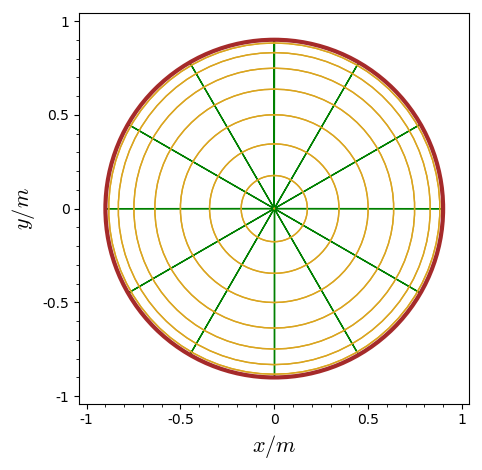

In [47]:
rzero = X.plot(KS, fixed_coords={t: 0, r: 0}, ambient_coords=(x,y), 
               parameters={a: ap}, number_values={th: 17, ph: 13}, color=coordcol)
rzero += circle((0,0), ap, color='brown', thickness=3) 
show(rzero, xmin=-1, xmax=1, ymin=-1, ymax=1, axes=False, frame=True,
     axes_labels=[r'$x/m$', r'$y/m$'])

In [48]:
rzero.save('ksm_rzero_disk.pdf', xmin=-1, xmax=1, ymin=-1, ymax=1, 
           axes=False, frame=True, axes_labels=[r'$x/m$', r'$y/m$'])

In [49]:
Xth_pi2 = X.plot(KS, fixed_coords={t: 0, th: pi/2}, ambient_coords=(x,y,z), 
                 parameters={a: ap}, number_values=11, color=coordcol,
                 max_range=rmax, thickness=1.5, label_axes=False)
Xth_pi2

Graphics3d Object

In [50]:
X.plot(KS, fixed_coords={t: 0, th: pi/3}, ambient_coords=(x,y,z), 
       parameters={a: ap}, number_values=11, color=coordcol,
       max_range=rmax, thickness=1.5, label_axes=False)

Graphics3d Object

In [51]:
graph = X.plot(KS, fixed_coords={t: 0, th: pi/6}, ambient_coords=(x,y,z), 
               parameters={a: ap}, number_values=11, color=coordcol,
               max_range=rmax, thickness=1.5, label_axes=False) \
        + Xth_pi2 \
        + circle((0,0,0), ap, color='lightgreen', fill=True) \
        + circle((0,0,0), ap, color='brown', thickness=6, linestyle='dashed')
show(graph)

Graphics3d Object